In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [2]:
titanic_data = pd.read_csv('C:\\Users\\Gazauto\\Downloads\\train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
 titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
 titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
# X.head()

In [9]:
y = titanic_data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
# sex = {"male": 0, "female": 1}
# titanic_data["Sex"] = titanic_data["Sex"].map(sex)
# titanic_data.head()

In [12]:
# titanic_data['Embarked'].uniqueue()

In [13]:
# sex = {"S": 1, "C": 2, 'Q': 2}
# titanic_data["Embarked"] = titanic_data["Embarked"].map(sex)
# titanic_data.head()

In [14]:
# titanic_data["Embarked"].fillna(0, inplace=True)

In [15]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [16]:
 titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
 X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [19]:
X['Age'].median()

28.0

In [20]:
X = X.fillna({'Age' : X['Age'].median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


[Text(144.51558373679578, 212.004, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(53.27033450704225, 201.132, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(20.040845070422534, 190.26, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(15.325352112676056, 179.388, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(12.967605633802817, 168.516, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(10.609859154929577, 157.644, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(15.325352112676056, 157.644, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(9.430985915492958, 146.772, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(4.715492957746479, 135.9, 'Fare <= 13.75\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(2.3577464788732394, 125.02799999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(7.073239436

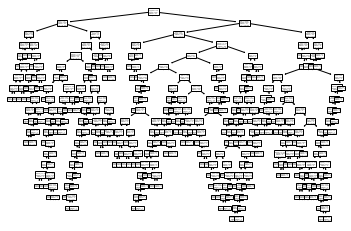

In [21]:
tree.plot_tree(clf.fit(X,y),  feature_names=X.columns)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [23]:
X_train.shape

(596, 10)

In [24]:
X_test.shape

(295, 10)

In [25]:
clf.score(X,y)

0.9797979797979798

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
clf.score(X_train, y_train)

0.8238255033557047

In [29]:
clf.score(X_test, y_test)

0.8203389830508474

In [30]:
max_depth_values = range(1, 100)

In [31]:
scores_date = pd.DataFrame()

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_date = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': mean_cross_val_score})
    scores_date = scores_date.append(temp_score_date)
scores_date.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [34]:
scores_date_long = pd.melt(scores_date, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')
scores_date_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

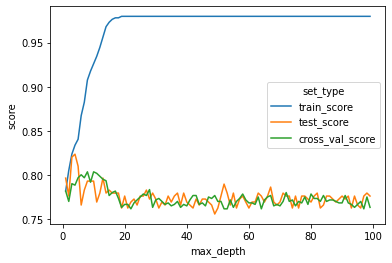

In [35]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_date_long)

In [36]:
scores_date_long.query("set_type == 'cross_val_score' ").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.791947
207,10,cross_val_score,0.803711


In [37]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [38]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8

In [39]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
715,3,19.0,0,0,7.6500,0,1,0,0,1
525,3,40.5,0,0,7.7500,0,1,0,1,0
381,3,1.0,0,2,15.7417,1,0,1,0,0
140,3,28.0,0,2,15.2458,1,0,1,0,0


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
clf = tree.DecisionTreeClassifier()

In [42]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [43]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [44]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [45]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [46]:
best_clf = grid_search_cv_clf.best_estimator_

In [47]:
best_clf.score(X_test, y_test)

0.7932203389830509

In [48]:
y_pred = best_clf.predict(X_test)

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
precision_score(y_test, y_pred)

0.8172043010752689

In [51]:
recall_score(y_test, y_pred)

0.6333333333333333

In [52]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [53]:
y_predicted_prob[:,1]

array([0.44444444, 0.25      , 0.06086957, 1.        , 1.        ,
       0.        , 0.75      , 0.06086957, 0.75      , 1.        ,
       1.        , 0.12      , 0.        , 0.13333333, 0.12      ,
       1.        , 0.        , 0.33333333, 0.06086957, 0.        ,
       0.06086957, 0.36842105, 0.33333333, 0.06086957, 0.06086957,
       0.        , 0.36842105, 0.25      , 0.        , 0.33333333,
       0.06086957, 1.        , 0.36842105, 1.        , 0.06086957,
       0.44444444, 0.36842105, 0.75      , 1.        , 0.06086957,
       0.        , 0.18181818, 0.06086957, 0.18181818, 0.        ,
       0.06086957, 0.06086957, 0.06086957, 0.18181818, 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.25      , 0.        , 1.        , 0.33333333,
       0.18181818, 1.        , 1.        , 0.        , 0.18181818,
       1.        , 0.        , 0.06086957, 0.13333333, 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.06086

<AxesSubplot:>

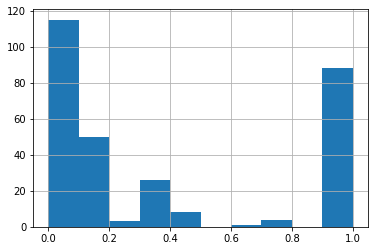

In [54]:
pd.Series(y_predicted_prob[:,1]).hist()

In [55]:
y_pred = np.where(y_predicted_prob[:,1] > 0.2, 1, 0)

In [56]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

In [57]:
precision_score(y_test, y_pred)

0.7461538461538462

In [58]:
recall_score(y_test, y_pred)

0.8083333333333333

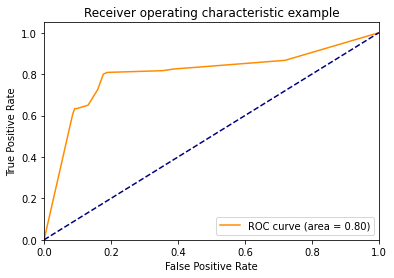

In [59]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [60]:
ar1 = np.ndarray(shape=(2,2), dtype=float, order='F')

In [61]:
ar1[1][0]

43.2

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [69]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

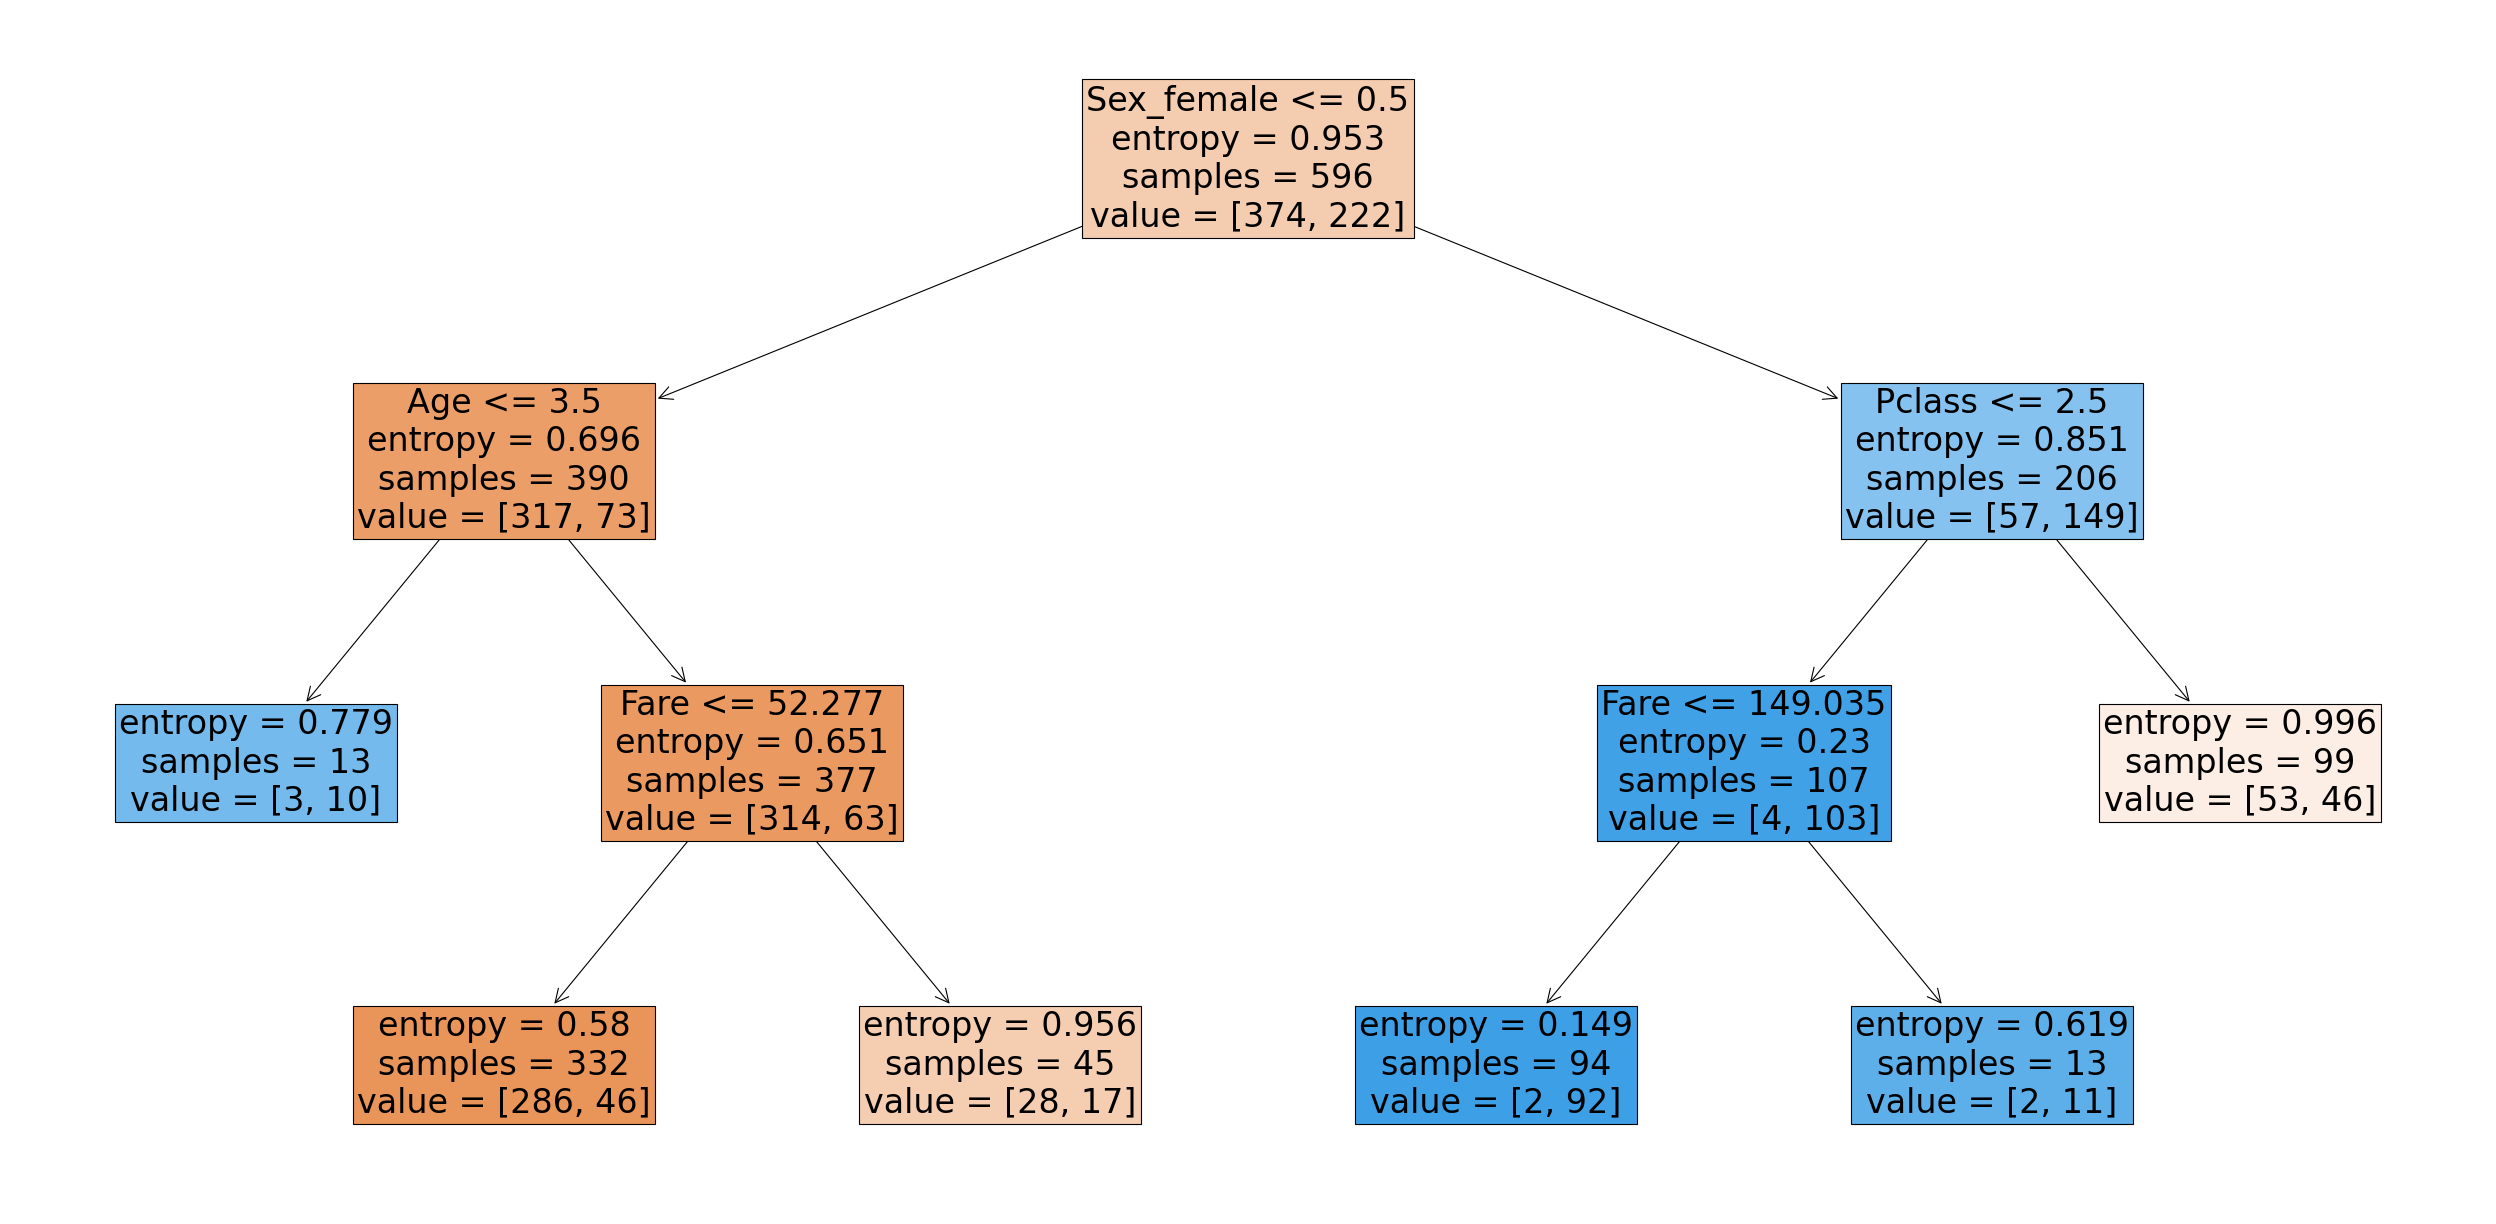

In [70]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))